# Density matrix simulator example

## Import relevant modules

In [1]:
import numpy as np

np.set_printoptions(linewidth=120, precision=4)

from basic_qc_simulator import Circuit
from basic_qc_simulator.simulators import DensityMatrixSimulator

## Create a circuit

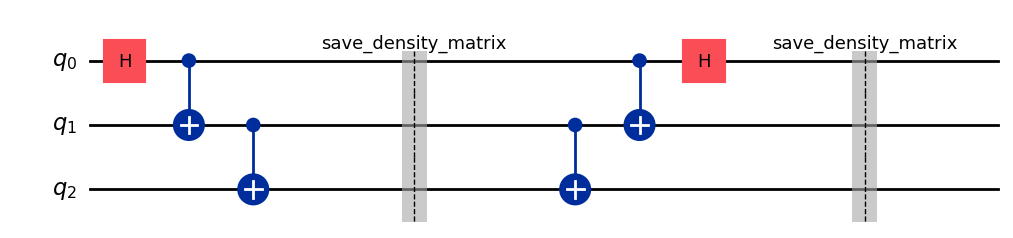

In [2]:
c = Circuit(3)
c.h(0)
c.cx(0, 1)
c.cx(1, 2)
c.save_result("density_matrix")
c.cx(1, 2)
c.cx(0, 1)
c.h(0)
c.save_result("density_matrix")
c.draw("mpl")

## Run the density matrix simulator

In [3]:
sim = DensityMatrixSimulator()
sim.run(c)

In [4]:
sim.results[0].result

DensityMatrix([[0.5+0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0.5+0.j]])

In [5]:
sim.results[1].result

DensityMatrix([[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]])

## Create a custom noise model

In [6]:
from basic_qc_simulator.noise import CustomNoiseModel, isotropic_depolarizing_channel

noise_model = CustomNoiseModel()
depolarizing_error_1 = isotropic_depolarizing_channel(0.001, 1)
depolarizing_error_2 = isotropic_depolarizing_channel(0.01, 2)
noise_model.add_noise_to_gate("h", depolarizing_error_1)
noise_model.add_noise_to_gate("cx", depolarizing_error_2)
noise_model

CustomNoiseModel(readout_error=None,
gate_errors={'h': 'Isotropic depolarizing channel with p=0.001', 'cx': 'Isotropic depolarizing channel with p=0.01'})

In [7]:
sim = DensityMatrixSimulator(noise_model=noise_model)
sim.run(c)

In [8]:
sim.results[0].result

DensityMatrix([[0.4934+0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.4887+0.j]
 [0.    +0.j 0.0013+0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j]
 [0.    +0.j 0.    +0.j 0.0013+0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j]
 [0.    +0.j 0.    +0.j 0.    +0.j 0.004 +0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j]
 [0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.004 +0.j 0.    +0.j 0.    +0.j 0.    +0.j]
 [0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.0013+0.j 0.    +0.j 0.    +0.j]
 [0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.0013+0.j 0.    +0.j]
 [0.4887+0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.4934+0.j]])